# Credit Risk Evaluator

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import/ read the csv data from Resourses folder
lending_df = pd.read_csv('Resources/lending_data.csv')
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Drop any row with null values
lending_df.dropna(inplace=True)
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


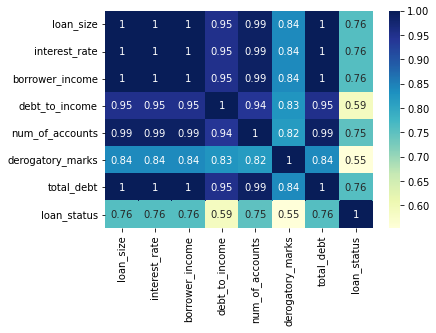

In [4]:
# Cheking the colinearity of features

# importing seaborn package
import seaborn as sb
  
# plotting correlation heatmap
dataplot = sb.heatmap(lending_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

## Predict Model Performance

* Since our data is numeric, has only 8 features and shows a good linear relationship among features, my educated guess will be that Logistic Regression model will perform better than the Random Forest Classifier model in predicting the risk level of given loans. My guess is based on the following information:

* Logistic Regression model is often used to predict to two discrete classes (BINARY CLASSIFICATION) and is preferred when:
    * The data is mostly non-categorical and low-dimensional (i.e. the number of covariates is small compared to the sample size).
    * The relationship between the features and the target variable is quite linear.
    * The goal is to explain the relationship between the features and target variable.
    
*  Random Forest Classifier model is preferrebly used when:
    * The data is more categorical and contains many features (big data sets).
    * The relationship between the features and the target variable is complex and non-linear.
    * There is a need to understand feature importance.

## Split the Data into Training and Testing Sets

In [5]:
# Create the features DataFrame, X , by removing the "loan_status" column    
X = lending_df.drop('loan_status', axis=1)

# Create y , the labels set, by using the "loan_status" column 
y = lending_df['loan_status'].values

# Split the data into training and testing datasets by using the train_test_split function  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Preprocess the Data

In [6]:
# Standardize the data (X) using "StandardScaler" function
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create, Fit and Compare Models

### Create, Fit and Score Logistic Regression Models

In [7]:
# Train a Logistic Regression model and print the model score
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [8]:
# Make prediction using the test data
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[18652,   113],
       [   10,   609]], dtype=int64)

In [9]:
# Compare actual model performance (test) with the prediction using "classification_report"
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.98      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Create, Fit and Score Random Forest Classifier Model

In [10]:
# Train a Random Forest Classifier model and print the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


In [11]:
# Make prediction using the test data
y_pred = clf.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[18665,   100],
       [   60,   559]], dtype=int64)

In [12]:
# Compare actual model performance (test) with the prediction using "classification_report"
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.90      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



## Analysis

* Training and testing scores for both the models are pretty similar and good (.99/ .99)

* Precision and recall for the "Nonrisky" loans ("0") is also same for both the model (1 and 0.99 respectively)


* Precision and recall for the "Risky" loans ("1") is DIFFERENT for each model:

  * Logistic Regression model has slightly low precision (0.84) as compared to Random Forest model (0.85). It is due to Logistic Regression model having more false positives (113) as compared to the Random Forest Classifier Model (100). This means that more "Nonrisky" loans are classified as "Risky" loans with Logistic Regression model. This might lead to loss of some potential clients but no bad loans/ loss of money to the company.  
  
  * Random Forest Classifier model has a much lower recall (0.90) has compared to the Logistic Regression model (0.98). It is due to Random Forest Classifier model having more false negatives (60) as compared to Logistic Regression model (10). This means that more "Risky" loans are classified as "Nonrisky" loans by Random Forest Classifier model. This will lead to more BAD LOANS and LOSS OF MONEY to the company.  
    
##### Hence Logistic Regression model is better than the Random Forest Classifier model for classification of risk level of given loans and it matches with my educated guess (prediction at the start).